In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
import os
os.chdir("/content/gdrive/My Drive/proje")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import numpy as np
import pandas as pd
from random import sample
import pickle, cv2
#from scipy.misc import imresize
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import keras
from keras import applications, optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
import h5py
from keras.utils import plot_model



Using TensorFlow backend.


In [0]:
seed = 1337
np.random.seed(seed)

epochs = 5
batch_size = 25
input_shape = (224, 224, 3)
 
data = np.load('/content/gdrive/My Drive/proje/images_labels_224.npz')
x = data['x']
y = data['y']
n_classes = len(np.unique(y))    


In [0]:
def train_validation_split(x, y):
    # split data into training and test sets
    X_training, X_test, y_training, y_test = train_test_split(x, y, stratify=y, test_size= 0.1, random_state=1337)

    # split training into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, stratify=y_training, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test



In [7]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_split(x, y)
print('Train data shape: ', X_train.shape) # 90% - 4752 (3564 + 1188)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape) # 10% - 528
print('Test labels shape: ', y_test.shape)

Train data shape:  (3564, 224, 224, 3)
Train labels shape:  (3564,)
Validation data shape:  (1188, 224, 224, 3)
Validation labels shape:  (1188,)
Test data shape:  (528, 224, 224, 3)
Test labels shape:  (528,)


In [0]:
def one_hot(y_train, y_val, y_test, n_classes):
    y_train = np_utils.to_categorical(y_train, n_classes)
    y_val = np_utils.to_categorical(y_val, n_classes)
    y_test = np_utils.to_categorical(y_test, n_classes)
    return y_train, y_val, y_test


In [9]:
y_train, y_val, y_test = one_hot(y_train, y_val, y_test, n_classes)

print(y_train)
print(y_val)
print(y_test)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [10]:
base_model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_tensor=None, input_shape=input_shape, classes=10)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(n_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

model.summary()

W0830 12:14:27.082298 139822642988928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 12:14:27.157165 139822642988928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 12:14:27.183522 139822642988928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 12:14:27.230560 139822642988928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0830 12:14:27.231498 1398226429

87916544/87910968 [==============================] - 1s 0us/step


W0830 12:14:47.976604 139822642988928 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0830 12:14:47.977855 139822642988928 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
# save the best model only
filepath ='/content/gdrive/My Drive/proje/model_InceptionV3.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, 
                                             monitor='val_acc', 
                                             verbose=1, 
                                             save_best_only=True, 
                                             mode='max')
callbacks_list = [checkpoint]


In [12]:
adam = Adam(lr=0.001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(loss=keras.losses.categorical_crossentropy,
              #optimizer=SGD(lr=0.1, momentum=0, decay=0, nesterov=False),
              #metrics=['accuracy'])

W0830 12:14:48.283313 139822642988928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [13]:
batch_size = 65
epochs = 10
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=callbacks_list,
                    verbose=1,
                    validation_data=(X_val, y_val))
    
    

W0830 12:14:48.471493 139822642988928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3564 samples, validate on 1188 samples
Epoch 1/10
3564/3564 [==============================] - 113s 32ms/step - loss: 1.9644 - acc: 0.3409 - val_loss: 3.9055 - val_acc: 0.2786

Epoch 00001: val_acc improved from -inf to 0.27862, saving model to /content/gdrive/My Drive/proje/model_InceptionV3.hdf5
Epoch 2/10
3564/3564 [==============================] - 70s 20ms/step - loss: 1.5581 - acc: 0.4672 - val_loss: 6.1043 - val_acc: 0.1380

Epoch 00002: val_acc did not improve from 0.27862
Epoch 3/10
3564/3564 [==============================] - 70s 20ms/step - loss: 1.2601 - acc: 0.5735 - val_loss: 1.8814 - val_acc: 0.4116

Epoch 00003: val_acc improved from 0.27862 to 0.41162, saving model to /content/gdrive/My Drive/proje/model_InceptionV3.hdf5
Epoch 4/10
3564/3564 [==============================] - 70s 20ms/step - loss: 1.1234 - acc: 0.6285 - val_loss: 2.1794 - val_acc: 0.3586

Epoch 00004: val_acc did not improve from 0.41162
Epoch 5/10
3564/3564 [==============================] - 

In [16]:
history.history["acc"]


[0.3409090992512744,
 0.467171728912026,
 0.5735129284621222,
 0.6285073168651022,
 0.7098765597499982,
 0.7595398570552017,
 0.7898428858530642,
 0.8310886741888643,
 0.8714927126361867,
 0.8841189745098653]

In [17]:
model.load_weights(filepath)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.9415283528241245
Test accuracy: 0.4071969696969697


In [0]:
plot_model(model, to_file='modelInceptionV3.png')

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

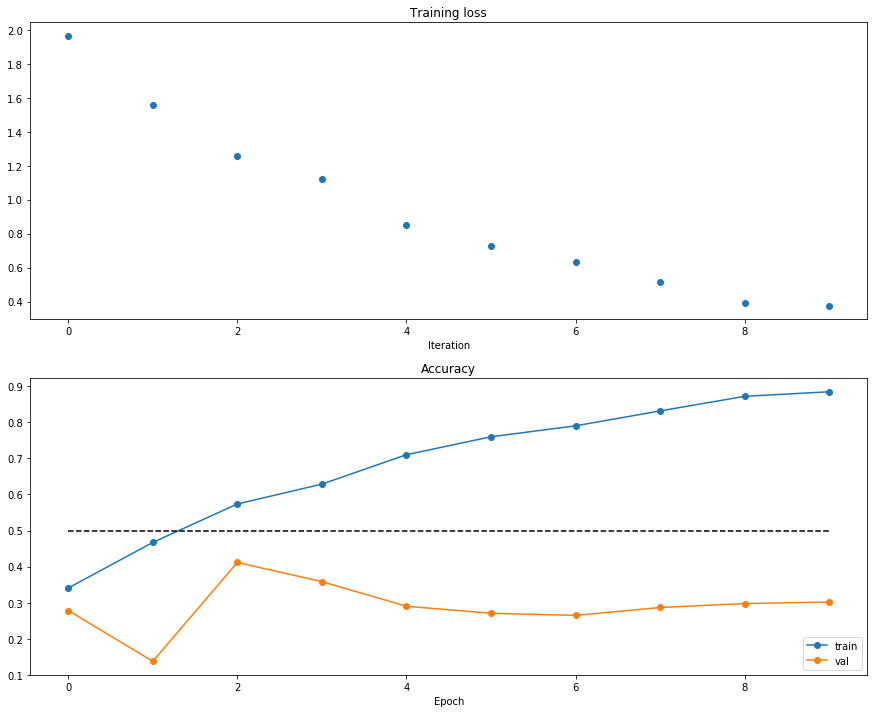

In [20]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(history.history["loss"], 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(history.history["acc"], '-o', label='train')
plt.plot(history.history["val_acc"], '-o', label='val')
plt.plot([0.5] * len(history.history["val_acc"]), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()